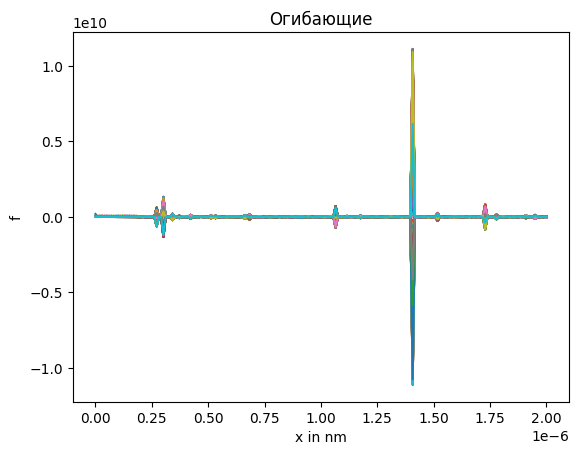

In [65]:
import matplotlib.pyplot as plt
from scipy import constants
import numpy as np

N = 200 # Подставляй значение N






effective_mass = 0.51e6 # в электрон-вольтах
voltage_0 = 4 # в электрон-вольтах
m_matrix = [1, -2, 0]
hamilton_operator = []
hamilton_operator_list = []


dirac_square_on_effective_mass = -1*(constants.hbar)/(2*effective_mass)



# Инициализирую параметры
def x_and_step(N):
  x = np.linspace(0, 2e-6, N)
  step_x = (np.max(x) - np.min(x))/(N-1)
  return x, step_x

def potentcial(x):
  return 1 - ((np.exp(2*x)-1)/(np.exp(2*x) + 1))**2

def normalize(vector):

  coef = 0

  for i in range(N-1):
    coef += step_x*(vector[i]+vector[i+1])/2

  return vector/coef


x, step_x = x_and_step(N)

for i in range(N):
  for j in range(N):

    if (i == j + 1) or (i == j - 1):
      m_ij = 1
    elif i == j:
      m_ij = -2
    else:
      m_ij = 0

    if i == j:
      cronecer = 1
    else:
      cronecer = 0


    # Матрица результата действия Гамильтониана на огибающую функцию
    hamilton_operator_list.append(
        dirac_square_on_effective_mass*(1/(step_x**2))*m_ij + voltage_0*potentcial(i)*cronecer
    )

  hamilton_operator.append(hamilton_operator_list)
  hamilton_operator_list = []

# Диагонализирую матрицу

hamilton_operator = np.array(hamilton_operator)

eigenvalues, eigenvectors = np.linalg.eig(hamilton_operator) #собственные значения, Собственные векторы

# нормирую собственные функции

new_vector = []

for vector in eigenvectors:
  new_vector.append(normalize(vector))

# Визуализация всех огибающих
plt.plot(x, new_vector)
plt.title('Огибающие')
plt.xlabel('x in nm')
plt.ylabel('f')
plt.show()





In [61]:
# Проверка работы нормировки (интеграл огибающей = 1)

suma = 0
vector = new_vector[7] #Менять индекс


for i in range(len(vector)):
  suma += step_x*vector[i]

suma

1.0

In [ ]:
# Производная dy/dx (Нужно для потенциала)

from sympy import symbols, tanh, diff

# Define the symbol and the equation
x, y = symbols('x y')
eq = y**5 + y + tanh(x)

# Calculate the derivative of y with respect to x
dy_dx = diff(eq, x)
dy_dx # tanh(x) = (exp(2x)-1)/(exp(2x) + 1)

1 - tanh(x)**2